# Comparing Q-Learning with SARSA in Reinforcement Learning

This notebook demonstrates a comparison between Q-Learning and SARSA algorithms using the `CliffWalking-v0` environment from the `gymnasium` library. The performance of both algorithms will be evaluated based on the cumulative rewards over episodes and the change in Q-values. Additionally, we will visualize the state visitation heatmaps for both algorithms.

## Import Libraries

We start by importing the necessary libraries, including `gymnasium` for the environment, `numpy` for numerical operations, and `matplotlib` for plotting the results.

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


pygame 2.5.2 (SDL 2.30.2, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Initialize the CliffWalking Environment

We create the `CliffWalking-v0` environment using the `gymnasium` library.

In [2]:
# Create the CliffWalking environment
env = gym.make("CliffWalking-v0")

## Q-Learning Parameters

We define the hyperparameters for the Q-Learning algorithm, initialize the Q-table, and define the epsilon-greedy policy function.

In [3]:
# Q-learning parameters
alpha = 0.1    # Learning rate
gamma = 0.99   # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 500

# Initialize the Q-table
Q = np.zeros((env.observation_space.n, env.action_space.n))

def epsilon_greedy_policy(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

## Track Rewards and Q-Value Changes

We initialize variables to track the cumulative rewards and changes in Q-values during training.

In [4]:
# Variables to track rewards and Q-value changes
rewards_q_learning = []
Q_values_q_learning = []

## Train the Agent using Q-Learning

We train the agent using the Q-Learning algorithm for a specified number of episodes.

In [5]:
# Training the agent using Q-learning
for episode in range(num_episodes):
    state, _ = env.reset(seed = 46)
    done = False
    total_reward = 0
    prev_Q = Q.copy()
    
    while not done:
        action = epsilon_greedy_policy(state, Q, epsilon)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        next_action = np.argmax(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
        state, action = next_state, next_action
        total_reward += reward
    
    rewards_q_learning.append(total_reward)
    Q_values_q_learning.append(np.sum(np.abs(Q - prev_Q)))

print("Training completed with Q-Learning.")

Training completed with Q-Learning.


## Initialize the Q-Table for SARSA

We initialize the Q-table for the SARSA algorithm and variables to track the rewards and Q-value changes during training.

In [6]:
# Initialize the Q-table for SARSA
Q_sarsa = np.zeros((env.observation_space.n, env.action_space.n))

# Variables to track rewards and Q-value changes for SARSA
rewards_sarsa = []
Q_values_sarsa = []

## Train the Agent using SARSA

We train the agent using the SARSA algorithm for a specified number of episodes.

In [7]:
# Training the agent using SARSA
for episode in range(num_episodes):
    state, _ = env.reset(seed = 46)
    done = False
    total_reward = 0
    prev_Q_sarsa = Q_sarsa.copy()
    
    while not done:
        action = epsilon_greedy_policy(state, Q_sarsa, epsilon)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        next_action = epsilon_greedy_policy(next_state, Q_sarsa, epsilon)
        Q_sarsa[state, action] = Q_sarsa[state, action] + alpha * (reward + gamma * Q_sarsa[next_state, next_action] - Q_sarsa[state, action])
        state, action = next_state, next_action
        total_reward += reward
    
    rewards_sarsa.append(total_reward)
    Q_values_sarsa.append(np.sum(np.abs(Q_sarsa - prev_Q_sarsa)))

print("Training completed with SARSA.")

Training completed with SARSA.


## Plot Cumulative Rewards

We plot the cumulative rewards over episodes for both Q-Learning and SARSA algorithms to compare their performance.

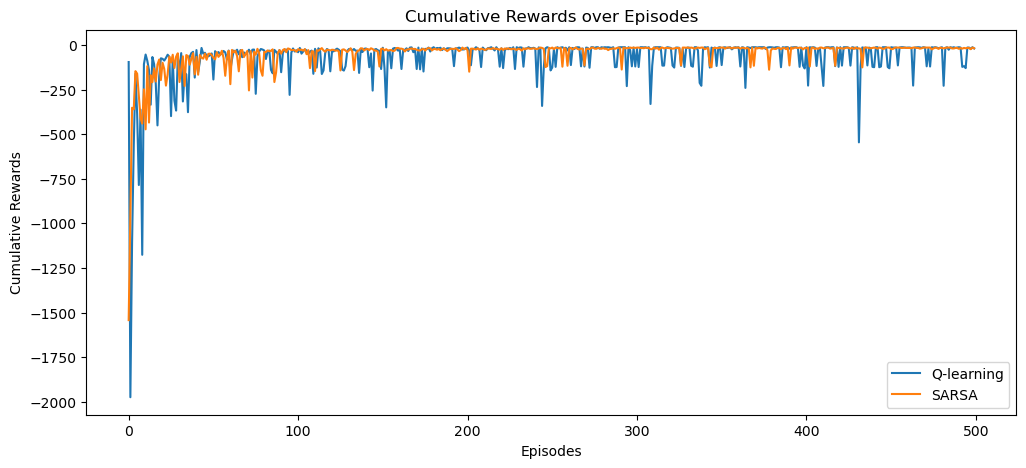

In [8]:
# Plot cumulative rewards
plt.figure(figsize=(12, 5))
plt.plot(rewards_q_learning, label='Q-learning')
plt.plot(rewards_sarsa, label='SARSA')
plt.title('Cumulative Rewards over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Rewards')
plt.legend()
plt.show()

## Plot Change in Q-Values

We plot the change in Q-values over episodes for both Q-Learning and SARSA algorithms to compare their convergence behavior.

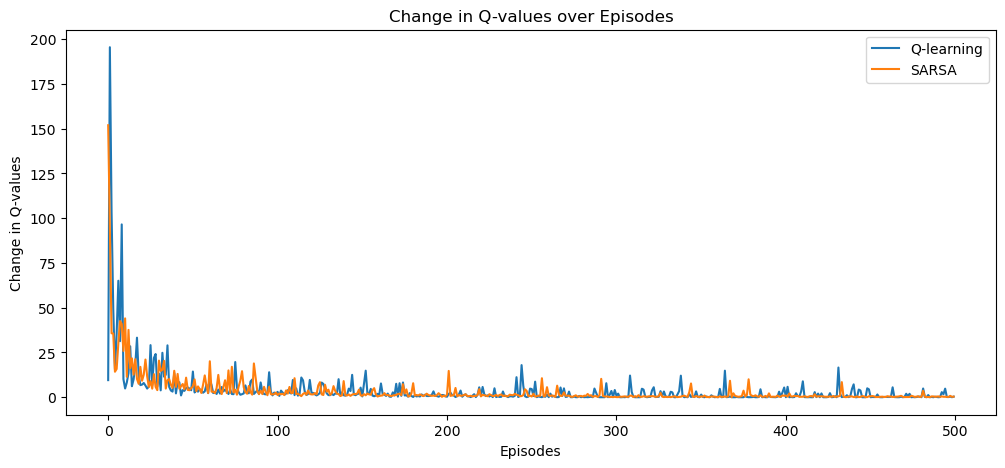

In [9]:
# Plot change in Q-values
plt.figure(figsize=(12, 5))
plt.plot(Q_values_q_learning, label='Q-learning')
plt.plot(Q_values_sarsa, label='SARSA')
plt.title('Change in Q-values over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Change in Q-values')
plt.legend()
plt.show()

## State Visitation Analysis

We run additional episodes to collect state visitation data and visualize it using heatmaps.

In [10]:
def run_episodes(env, Q, num_episodes=100):
    state_visits = np.zeros(env.observation_space.n)
    for episode in range(num_episodes):
        state, _ = env.reset(seed = 46)
        done = False
        while not done:
            action = np.argmax(Q[state])
            state_visits[state] += 1
            state, _, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
    return state_visits

# Run episodes and collect state visitation data
q_learning_visits = run_episodes(env, Q)
sarsa_visits = run_episodes(env, Q_sarsa)

# Convert state visitation data to grid shape
grid_shape = env.unwrapped.shape
q_learning_heatmap = q_learning_visits.reshape(grid_shape)
sarsa_heatmap = sarsa_visits.reshape(grid_shape)

## Plot the Heatmaps

We plot the state visitation heatmaps for both Q-Learning and SARSA algorithms to visualize the state visitation frequency.

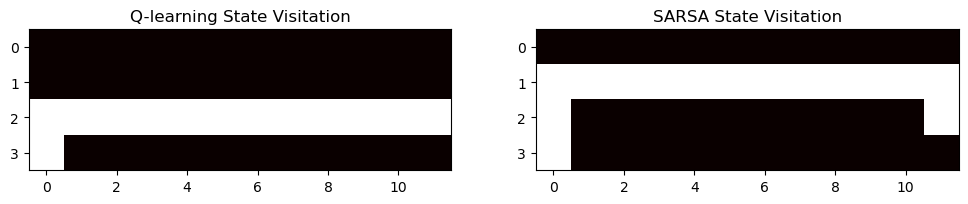

In [11]:
# Plot the heatmaps
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(q_learning_heatmap, cmap='hot', interpolation='nearest')
ax[0].set_title('Q-learning State Visitation')
ax[1].imshow(sarsa_heatmap, cmap='hot', interpolation='nearest')
ax[1].set_title('SARSA State Visitation')
plt.show()